In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import zipfile
import matplotlib.pyplot as plt

In [ ]:
zip_ref=zipfile.ZipFile("archive.zip","r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
df=pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
df=df.dropna(axis=0)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [ ]:
df["Potability"].value_counts()

0    1200
1     811
Name: Potability, dtype: int64

In [ ]:
pd.get_dummies(df)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [ ]:
y=df["Potability"]
y=y.reset_index()

In [ ]:
y=y.drop("index",axis=1)

In [ ]:
x=df.loc[:,:"Turbidity"]
x=x.reset_index()

In [ ]:
x=x.drop("index",axis=1)

In [ ]:
x

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843
2007,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
2008,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
2009,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
x_train=x_train.to_numpy()
y_train=y_train.to_numpy()
x_test=x_test.to_numpy()
y_test=y_test.to_numpy()

In [ ]:
len(x_test),len(y_test)

(403, 403)

In [ ]:
len(x_train),len(y_train)

(1608, 1608)

In [ ]:
x_train.shape,y_train.shape

((1608, 9), (1608, 1))

In [ ]:
y_train[:5]

array([[0],
       [0],
       [1],
       [1],
       [0]])

In [ ]:
y_test

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [ ]:
y_train.ndim

2

In [ ]:
x_train.ndim

2

In [ ]:
y_train.shape

(1608, 1)

In [ ]:
y_train[:20]

array([[0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]])

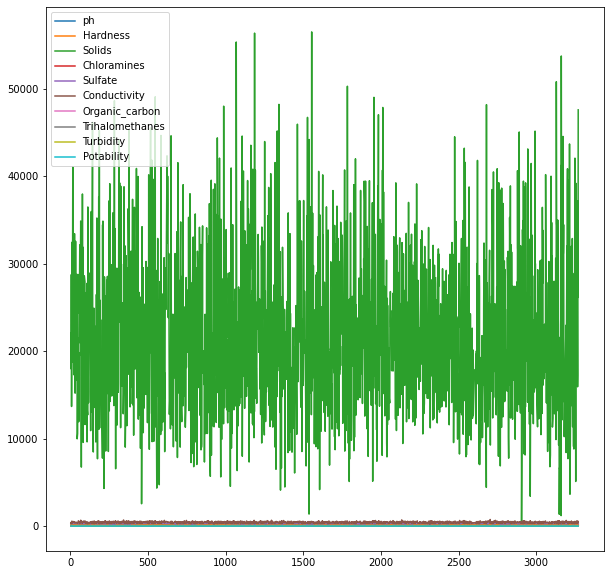

In [ ]:
df.plot(figsize=(10,10))

#Model Building

Baseline Model

In [ ]:
from tensorflow.keras import Sequential,layers
from tensorflow.keras.layers import Dense,Conv1D,LSTM

In [ ]:
tf.random.set_seed(42)
model_1=Sequential([
    Dense(100,activation="softmax"),
    Dense(1,activation="sigmoid")
],name="Model_1")

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_1.fit(x_train,y_train,
            epochs=100,
            validation_data=(x_test,y_test))

Epoch 1/100
100/100 [==============================] - 1s 4ms/step - loss: 0.6931 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4812
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5050 - val_loss: 0.6929 - val_accuracy: 0.4837
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5141 - val_loss: 0.6922 - val_accuracy: 0.5200
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5357 - val_loss: 0.6913 - val_accuracy: 0.5088
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.5426 - val_loss: 0.6896 - val_accuracy: 0.5100
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5704 - val_loss: 0.6868 - val_accuracy: 0.5425
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5854 - val_loss: 0.6829 - val_accuracy: 0.5700

In [ ]:
model_1.evaluate(x_test,y_test)

13/13 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.5732


[0.6842136383056641, 0.5732010006904602]

In [ ]:
tf.round(model_1.predict(x_test))

13/13 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(403, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
 

In [ ]:
model_2=Sequential([
    Dense(9,activation="relu"),
    Dense(8,activation="sigmoid"),
    Dense(1,activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.fit(x_train,y_train,
            epochs=100)

Epoch 1/100
51/51 [==============================] - 1s 4ms/step - loss: 0.7376 - accuracy: 0.3974
Epoch 2/100
51/51 [==============================] - 0s 6ms/step - loss: 0.6999 - accuracy: 0.4459
Epoch 3/100
51/51 [==============================] - 0s 6ms/step - loss: 0.6827 - accuracy: 0.6026
Epoch 4/100
51/51 [==============================] - 0s 7ms/step - loss: 0.6759 - accuracy: 0.6039
Epoch 5/100
51/51 [==============================] - 0s 5ms/step - loss: 0.6730 - accuracy: 0.6039
Epoch 6/100
51/51 [==============================] - 0s 5ms/step - loss: 0.6718 - accuracy: 0.6039
Epoch 7/100
51/51 [==============================] - 0s 8ms/step - loss: 0.6715 - accuracy: 0.6039
Epoch 8/100
51/51 [==============================] - 0s 7ms/step - loss: 0.6716 - accuracy: 0.6039
Epoch 9/100
51/51 [==============================] - 0s 6ms/step - loss: 0.6715 - accuracy: 0.6039
Epoch 10/100
51/51 [==============================] - 0s 6ms/step - loss: 0.6716 - accuracy: 0.6039
Epoch 11/

In [ ]:
model_2.predict(x_test)

13/13 [==============================] - 0s 1ms/step


array([[0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.79111385],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.39518562],
       [0.395

In [ ]:
model_3=Sequential([
    layers.Lambda(lambda x:tf.expand_dims(x,axis=1)),
    LSTM(8,activation="sigmoid"),
    Dense(1,activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(x_train,y_train,
            epochs=50,
            validation_data=(x_test,y_test))

Epoch 1/50
51/51 [==============================] - 2s 11ms/step - loss: 0.7153 - accuracy: 0.4546 - val_loss: 0.6905 - val_accuracy: 0.5484
Epoch 2/50
51/51 [==============================] - 0s 6ms/step - loss: 0.6887 - accuracy: 0.5379 - val_loss: 0.6792 - val_accuracy: 0.5931
Epoch 3/50
51/51 [==============================] - 0s 6ms/step - loss: 0.6741 - accuracy: 0.6057 - val_loss: 0.6824 - val_accuracy: 0.5732
Epoch 4/50
51/51 [==============================] - 0s 6ms/step - loss: 0.6740 - accuracy: 0.5964 - val_loss: 0.6829 - val_accuracy: 0.5732
Epoch 5/50
51/51 [==============================] - 0s 6ms/step - loss: 0.6727 - accuracy: 0.6026 - val_loss: 0.6831 - val_accuracy: 0.5732
Epoch 6/50
51/51 [==============================] - 0s 6ms/step - loss: 0.6723 - accuracy: 0.6026 - val_loss: 0.6835 - val_accuracy: 0.5732
Epoch 7/50
51/51 [==============================] - 0s 7ms/step - loss: 0.6721 - accuracy: 0.6026 - val_loss: 0.6839 - val_accuracy: 0.5732
Epoch 8/50
51/51 [=

In [ ]:
model_1.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1000      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,101
Trainable params: 1,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 9)              0         
                                                                 
 lstm (LSTM)                 (None, 8)                 576       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 585
Trainable params: 585
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4=Sequential([
    layers.Lambda(lambda x:tf.expand_dims(x,axis=0)),
    Conv1D(filters=32,
           kernel_size=2,
           padding="valid",
           activation="sigmoid"),
    layers.GlobalMaxPool1D(),
    Dense(1,activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_4.fit(x_train,y_train,
            epochs=100,
            validation_data=(x_test,y_test))

Epoch 1/100
51/51 [==============================] - 6s 8ms/step - loss: 0.6991 - accuracy: 0.6026 - val_loss: 0.6950 - val_accuracy: 0.5732
Epoch 2/100
51/51 [==============================] - 0s 5ms/step - loss: 0.6748 - accuracy: 0.6026 - val_loss: 0.6912 - val_accuracy: 0.5732
Epoch 3/100
51/51 [==============================] - 0s 4ms/step - loss: 0.6783 - accuracy: 0.5976 - val_loss: 0.6958 - val_accuracy: 0.5732
Epoch 4/100
51/51 [==============================] - 0s 5ms/step - loss: 0.6751 - accuracy: 0.6026 - val_loss: 0.6842 - val_accuracy: 0.5732
Epoch 5/100
51/51 [==============================] - 0s 4ms/step - loss: 0.6750 - accuracy: 0.5951 - val_loss: 0.6888 - val_accuracy: 0.5732
Epoch 6/100
51/51 [==============================] - 0s 4ms/step - loss: 0.6744 - accuracy: 0.5989 - val_loss: 0.6846 - val_accuracy: 0.5732
Epoch 7/100
51/51 [==============================] - 0s 5ms/step - loss: 0.6760 - accuracy: 0.6026 - val_loss: 0.6855 - val_accuracy: 0.5732
Epoch 8/100
5

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(x_train,y_train,
          epochs=100)

Epoch 1/100
51/51 [==============================] - 1s 3ms/step - loss: 96.5025 - accuracy: 0.5093
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 11.4353 - accuracy: 0.5367
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 10.6009 - accuracy: 0.5379
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 9.2943 - accuracy: 0.5261
Epoch 5/100
51/51 [==============================] - 0s 3ms/step - loss: 9.8234 - accuracy: 0.5386
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 9.4376 - accuracy: 0.5423
Epoch 7/100
51/51 [==============================] - 0s 3ms/step - loss: 10.2992 - accuracy: 0.5454
Epoch 8/100
51/51 [==============================] - 0s 3ms/step - loss: 7.7669 - accuracy: 0.5236
Epoch 9/100
51/51 [==============================] - 0s 3ms/step - loss: 7.7770 - accuracy: 0.5305
Epoch 10/100
51/51 [==============================] - 0s 3ms/step - loss: 9.4025 - accuracy: 0.5535
Epoch

#Upsampling

In [ ]:
df=pd.read_csv("water_potability.csv")

In [ ]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="mean")
r=imp.fit_transform(df[["ph"]])
s=imp.fit_transform(df[["Sulfate"]])
t=imp.fit_transform(df[["Trihalomethanes"]])
df["ph"]=r
df["Sulfate"]=s
df["Trihalomethanes"]=t

In [ ]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
zero=df[df["Potability"]==0]
one=df[df["Potability"]==1]
from sklearn.utils import resample
df_minority_upsampled=resample(one,replace=True,n_samples=1998)
df=pd.concat([zero,df_minority_upsampled])

In [ ]:
from sklearn.preprocessing import StandardScaler
X=df.iloc[:,:9].values
y=df.iloc[:,9:].values

sc=StandardScaler()
X=sc.fit_transform(X)

In [ ]:
X

array([[ 1.39929696e-02,  2.64742139e-01, -1.51046530e-01, ...,
        -1.17467442e+00,  1.31201803e+00, -1.28119067e+00],
       [-2.33944928e+00, -2.01549621e+00, -3.95565634e-01, ...,
         2.70778018e-01, -6.46112725e-01,  6.93197311e-01],
       [ 7.26261470e-01,  8.49272216e-01, -2.50808368e-01, ...,
         7.79258944e-01, -1.67996169e-03, -1.16202482e+00],
       ...,
       [ 3.05100659e-01,  1.53295276e+00,  5.71643045e-02, ...,
         5.60237915e-01,  8.46755053e-01, -1.57839370e-01],
       [ 3.32175770e-01,  7.75433876e-01, -8.25522407e-01, ...,
         1.03920070e+00, -4.31727926e-01,  3.17841502e-01],
       [ 1.29201890e+00,  1.91342952e-01,  1.30417468e+00, ...,
         1.34875958e+00,  8.25367070e-01,  8.73749918e-01]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)

(3196, 800, 3196, 800)

In [ ]:
y_train

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [ ]:
model_6=tf.keras.Sequential([
    Dense(100,activation="relu"),
    Dense(1,activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

NameError: ignored

In [ ]:
model_6.fit(x_train,y_train,
            epochs=50,
            validation_data=(x_test,y_test))

Epoch 1/50
100/100 [==============================] - 3s 5ms/step - loss: 0.6902 - accuracy: 0.5482 - val_loss: 0.6700 - val_accuracy: 0.5738
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.6145 - val_loss: 0.6548 - val_accuracy: 0.6100
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.6389 - accuracy: 0.6505 - val_loss: 0.6456 - val_accuracy: 0.6075
Epoch 4/50
100/100 [==============================] - 1s 6ms/step - loss: 0.6221 - accuracy: 0.6630 - val_loss: 0.6323 - val_accuracy: 0.6400
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.6091 - accuracy: 0.6749 - val_loss: 0.6278 - val_accuracy: 0.6313
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.6004 - accuracy: 0.6755 - val_loss: 0.6289 - val_accuracy: 0.6288
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.5945 - accuracy: 0.6793 - val_loss: 0.6240 - val_accuracy: 0.6350
Epoch 

In [ ]:
model_6.evaluate(x_test,y_test)

25/25 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.6413


[0.6270334124565125, 0.6412500143051147]

In [ ]:
baseline_model=Sequential([
    layers.Dense(128, input_shape= (9,), activation= 'relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation= 'relu'),
    layers.Dropout(0.4),
    layers.Dense(32, activation= 'relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation= 'sigmoid')

])

baseline_model.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       metrics=["accuracy"])

baseline_model.fit(x_train,y_train,
                   epochs=50,
                   validation_data=(x_test,y_test))

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 0.7053 - accuracy: 0.5147 - val_loss: 0.6879 - val_accuracy: 0.5587
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5119 - val_loss: 0.6826 - val_accuracy: 0.5775
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.5344 - val_loss: 0.6727 - val_accuracy: 0.6012
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.6784 - accuracy: 0.5629 - val_loss: 0.6671 - val_accuracy: 0.6025
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.6691 - accuracy: 0.5820 - val_loss: 0.6579 - val_accuracy: 0.6288
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.6637 - accuracy: 0.5820 - val_loss: 0.6499 - val_accuracy: 0.6162
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.6490 - accuracy: 0.6092 - val_loss: 0.6439 - val_accuracy: 0.6137
Epoch 

In [ ]:
baseline_model.evaluate(x_test,y_test)

25/25 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.6375


[0.616722047328949, 0.637499988079071]

In [ ]:
x_train.ndim

2

In [ ]:
model_7=Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=-1)),
    layers.LSTM(32,return_sequences=True),
    layers.GRU(16,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid"),
    layers.LSTM(128),
    Dense(1,activation="sigmoid")
])

model_7.compile(loss="mae",
                optimizer="adam",
                metrics=["accuracy"])

model_7.fit(x_train,y_train,
            epochs=500,
            validation_data=(x_test,y_test),
            batch_size=32,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                        patience=70,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                            patience=40,
                                                            verbose=1)])

Epoch 1/500
100/100 [==============================] - 7s 17ms/step - loss: 0.5004 - accuracy: 0.5006 - val_loss: 0.5003 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 2/500
100/100 [==============================] - 1s 8ms/step - loss: 0.5005 - accuracy: 0.5044 - val_loss: 0.5010 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 3/500
100/100 [==============================] - 1s 8ms/step - loss: 0.4968 - accuracy: 0.5041 - val_loss: 0.4955 - val_accuracy: 0.4850 - lr: 0.0010
Epoch 4/500
100/100 [==============================] - 1s 9ms/step - loss: 0.4808 - accuracy: 0.5172 - val_loss: 0.5042 - val_accuracy: 0.4975 - lr: 0.0010
Epoch 5/500
100/100 [==============================] - 1s 8ms/step - loss: 0.4735 - accuracy: 0.5275 - val_loss: 0.5033 - val_accuracy: 0.4975 - lr: 0.0010
Epoch 6/500
100/100 [==============================] - 1s 9ms/step - loss: 0.4606 - accuracy: 0.5363 - val_loss: 0.5142 - val_accuracy: 0.4825 - lr: 0.0010
Epoch 7/500
100/100 [==============================] - 1s 8ms/s

In [ ]:
model_7.evaluate(x_test,y_test)

25/25 [==============================] - 0s 4ms/step - loss: 0.3752 - accuracy: 0.6288


[0.3751956522464752, 0.6287500262260437]

In [ ]:
from tensorflow.keras import layers
model_8=Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=-1)),
    layers.LSTM(32,return_sequences=True),
    layers.GRU(16,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid"),
    layers.LSTM(128,return_sequences=True),
    layers.GRU(8),
    Dense(1,activation="sigmoid")
])

model_8.compile(loss="mae",
                optimizer="adam",
                metrics=["accuracy"])

model_8.fit(x_train,y_train,
            epochs=500,
            validation_data=(x_test,y_test),
            batch_size=32,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                        patience=70,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                            patience=40,
                                                            verbose=1)])

Epoch 1/500
100/100 [==============================] - 8s 21ms/step - loss: 0.5006 - accuracy: 0.5041 - val_loss: 0.5005 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 2/500
100/100 [==============================] - 1s 10ms/step - loss: 0.5008 - accuracy: 0.5063 - val_loss: 0.5041 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 3/500
100/100 [==============================] - 1s 10ms/step - loss: 0.4966 - accuracy: 0.5056 - val_loss: 0.5041 - val_accuracy: 0.4837 - lr: 0.0010
Epoch 4/500
100/100 [==============================] - 1s 10ms/step - loss: 0.4926 - accuracy: 0.5091 - val_loss: 0.5080 - val_accuracy: 0.4837 - lr: 0.0010
Epoch 5/500
100/100 [==============================] - 1s 9ms/step - loss: 0.4826 - accuracy: 0.5219 - val_loss: 0.4991 - val_accuracy: 0.5025 - lr: 0.0010
Epoch 6/500
100/100 [==============================] - 1s 9ms/step - loss: 0.4896 - accuracy: 0.5078 - val_loss: 0.5093 - val_accuracy: 0.4875 - lr: 0.0010
Epoch 7/500
100/100 [==============================] - 1s 10

In [ ]:
model_8.evaluate(x_test,y_test)

25/25 [==============================] - 0s 4ms/step - loss: 0.4798 - accuracy: 0.5213


[0.4798150360584259, 0.5212500095367432]

In [ ]:
model_9=Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=-1)),
    layers.LSTM(32,return_sequences=True),
    layers.GRU(16,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid"),
    layers.LSTM(128,return_sequences=True),
    layers.GRU(8),
    Dense(1,activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

model_9.fit(x_train,y_train,
            epochs=500,
            validation_data=(x_test,y_test),
            batch_size=32,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                        patience=100,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                            patience=35,
                                                            verbose=1)])

Epoch 1/500
100/100 [==============================] - 8s 21ms/step - loss: 0.6940 - accuracy: 0.4937 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 2/500
100/100 [==============================] - 1s 9ms/step - loss: 0.6934 - accuracy: 0.4953 - val_loss: 0.6922 - val_accuracy: 0.5400 - lr: 0.0010
Epoch 3/500
100/100 [==============================] - 1s 9ms/step - loss: 0.6920 - accuracy: 0.5188 - val_loss: 0.6893 - val_accuracy: 0.5275 - lr: 0.0010
Epoch 4/500
100/100 [==============================] - 1s 9ms/step - loss: 0.6843 - accuracy: 0.5435 - val_loss: 0.6907 - val_accuracy: 0.5300 - lr: 0.0010
Epoch 5/500
100/100 [==============================] - 1s 10ms/step - loss: 0.6802 - accuracy: 0.5523 - val_loss: 0.6890 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 6/500
100/100 [==============================] - 1s 9ms/step - loss: 0.6777 - accuracy: 0.5516 - val_loss: 0.6898 - val_accuracy: 0.5350 - lr: 0.0010
Epoch 7/500
100/100 [==============================] - 1s 9ms/

In [ ]:
model_9.evaluate(x_test,y_test)

25/25 [==============================] - 0s 4ms/step - loss: 1.0040 - accuracy: 0.7663


[1.0040321350097656, 0.7662500143051147]

In [ ]:
preds=tf.round(model_9.predict(x_test))
preds[:10]

25/25 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)>

In [ ]:
y_test[:10]

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1]])

In [ ]:
model_11=Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=-1)),
    layers.LSTM(32,return_sequences=True),
    layers.GRU(16,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid"),
    layers.LSTM(128,return_sequences=True),
    layers.GRU(8,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=3,
                  padding="valid",
                  activation="relu"),
    layers.LSTM(64),
    Dense(1,activation="sigmoid")
])

In [ ]:
model_11.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])

model_11.fit(x_train,y_train,
            epochs=500,
            validation_data=(x_test,y_test),
            batch_size=32,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                        patience=100,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                            patience=35,
                                                            verbose=1)])

Epoch 1/500
100/100 [==============================] - 10s 25ms/step - loss: 0.6937 - accuracy: 0.4959 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 2/500
100/100 [==============================] - 1s 11ms/step - loss: 0.6933 - accuracy: 0.5041 - val_loss: 0.6933 - val_accuracy: 0.4737 - lr: 0.0010
Epoch 3/500
100/100 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.5041 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 4/500
100/100 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.5038 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 5/500
100/100 [==============================] - 1s 11ms/step - loss: 0.6928 - accuracy: 0.5122 - val_loss: 0.6910 - val_accuracy: 0.5200 - lr: 0.0010
Epoch 6/500
100/100 [==============================] - 1s 11ms/step - loss: 0.6918 - accuracy: 0.5203 - val_loss: 0.6946 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 7/500
100/100 [==============================] - 1s

In [ ]:
import os
def create_model_checkpoint(model_name,save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                            verbose=0,
                                            save_best_only=True)

In [ ]:

model_10=Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=-1)),
    layers.LSTM(32,return_sequences=True),
    layers.GRU(16,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid"),
    layers.LSTM(128,return_sequences=True),
    layers.GRU(8,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=3,
                  padding="valid",
                  activation="relu"),
    layers.LSTM(64,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid",
                  activation="relu"),
    layers.GRU(16),
    Dense(1,activation="sigmoid")
])
model_10.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])

model_10.fit(x_train,y_train,
            epochs=500,
            validation_data=(x_test,y_test),
            batch_size=32,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                        patience=80,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                            patience=35,
                                                            verbose=1)])
                       #create_model_checkpoint(model_name="model_10")])

Epoch 1/500
100/100 [==============================] - 12s 39ms/step - loss: 0.6934 - accuracy: 0.4937 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 2/500
100/100 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 3/500
100/100 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 4/500
100/100 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6936 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 5/500
100/100 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 6/500
100/100 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 7/500
100/100 [==============================] - 1s

KeyboardInterrupt: ignored

In [ ]:
model_10.evaluate(x_test,y_test)

25/25 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.4812


[0.6934122443199158, 0.48124998807907104]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model_12=Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=-1)),
    layers.LSTM(32,return_sequences=True),
    layers.GRU(16,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid"),
    layers.LSTM(128,return_sequences=True),
    layers.GRU(8,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=3,
                  padding="valid",
                  activation="relu"),
    layers.LSTM(64,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid",
                  activation="relu"),
    layers.GRU(16,return_sequences=True),
    layers.LSTM(8),
    Dense(1,activation="sigmoid")
])
model_12.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])

model_12.fit(x_train,y_train,
            epochs=500,
            validation_data=(x_test,y_test),
            batch_size=32,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                        patience=80,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                            patience=35,
                                                            verbose=1)])

Epoch 1/500
100/100 [==============================] - 18s 34ms/step - loss: 0.6933 - accuracy: 0.5028 - val_loss: 0.6933 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 2/500
100/100 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 3/500
100/100 [==============================] - 1s 14ms/step - loss: 0.6931 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 4/500
100/100 [==============================] - 1s 14ms/step - loss: 0.6931 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 5/500
100/100 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 6/500
100/100 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 7/500
100/100 [==============================] - 1s

In [ ]:
model_12.evaluate(x_test,y_test)

25/25 [==============================] - 0s 6ms/step - loss: 0.9415 - accuracy: 0.7763


[0.9415484666824341, 0.7762500047683716]

In [ ]:
tf.keras.models.save_model(model=model_12,filepath="model_12")

In [ ]:
loaded_model_1=tf.keras.models.load_model("model_12")

In [ ]:
loaded_model_1.evaluate(x_test,y_test)

25/25 [==============================] - 2s 6ms/step - loss: 0.9415 - accuracy: 0.7763


[0.9415484666824341, 0.7762500047683716]

In [ ]:
model_13=Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=-1)),
    layers.LSTM(16,return_sequences=True),
    #layers.Lambda(lambda x: tf.expand_dims(x,axis=-1)),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="same",
                  activation="sigmoid"),
    layers.LSTM(32,return_sequences=True),
    layers.GRU(16,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="same",
                  activation="softmax"),
    layers.LSTM(128,return_sequences=True),
    layers.GRU(8,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=3,
                  padding="valid",
                  activation="relu"),
    layers.LSTM(64,return_sequences=True),
    # layers.Conv1D(filters=32,
    #               kernel_size=4,
    #               padding="valid",
    #               activation="relu"),
    layers.GRU(16,return_sequences=True),
    layers.LSTM(8,return_sequences=True),
    #layers.GlobalAveragePooling1D(),
    #layers.Conv1D(filters=16,
                  # kernel_size=2,
                  # padding="same",
                  # activation="relu"),
    #layers.GRU(16,return_sequences=True),
    layers.LSTM(8),
    Dense(1,activation="sigmoid")
])

model_13.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])

In [ ]:
model_13.fit(x_train,y_train,
            epochs=500,
            validation_data=(x_test,y_test),
            batch_size=32,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                        patience=80,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                            patience=35,
                                                            verbose=1)])

Epoch 1/500
100/100 [==============================] - 17s 44ms/step - loss: 0.6936 - accuracy: 0.4928 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 2/500
100/100 [==============================] - 2s 17ms/step - loss: 0.6933 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 3/500
100/100 [==============================] - 2s 17ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 4/500
100/100 [==============================] - 2s 18ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6936 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 5/500
100/100 [==============================] - 2s 18ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 6/500
100/100 [==============================] - 2s 18ms/step - loss: 0.6932 - accuracy: 0.4959 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 7/500
100/100 [==============================] - 2s

In [ ]:
model_14=Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=-1)),
    layers.LSTM(8,return_sequences=True),
    layers.GRU(16,return_sequences=True),
    layers.LSTM(32,return_sequences=True),
    layers.GRU(16,return_sequences=True),
    layers.LSTM(8,return_sequences=True),
    layers.Dense(1,activation="sigmoid")
])

model_14.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

model_14.fit(x_train,y_train,
            epochs=1000,
            validation_data=(x_test,y_test),
            batch_size=32,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                        patience=80,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                            patience=35,
                                                            verbose=1)])

Epoch 1/1000
100/100 [==============================] - 9s 25ms/step - loss: 0.6936 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.4908 - lr: 0.0010
Epoch 2/1000
100/100 [==============================] - 1s 11ms/step - loss: 0.6933 - accuracy: 0.5054 - val_loss: 0.6933 - val_accuracy: 0.4817 - lr: 0.0010
Epoch 3/1000
100/100 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6932 - val_accuracy: 0.4837 - lr: 0.0010
Epoch 4/1000
100/100 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.5048 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 5/1000
100/100 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.5053 - val_loss: 0.6930 - val_accuracy: 0.5126 - lr: 0.0010
Epoch 6/1000
100/100 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.4977 - val_loss: 0.6933 - val_accuracy: 0.4819 - lr: 0.0010
Epoch 7/1000
100/100 [==============================

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
model_15=Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=-1)),
    layers.Conv1D(filters=32,
                  kernel_size=2,
                  padding="valid",
                  activation="relu"),
    layers.LSTM(8),
    layers.Dense(1,activation="sigmoid")
])

model_15.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])

model_15.fit(x_train,y_train,
            epochs=500,
            validation_data=(x_test,y_test),
            batch_size=32,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                        patience=100,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                            patience=35,
                                                            verbose=1)])

Epoch 1/500
100/100 [==============================] - 3s 9ms/step - loss: 0.6927 - accuracy: 0.5166 - val_loss: 0.6933 - val_accuracy: 0.5088 - lr: 0.0010
Epoch 2/500
100/100 [==============================] - 1s 5ms/step - loss: 0.6914 - accuracy: 0.5332 - val_loss: 0.6950 - val_accuracy: 0.4913 - lr: 0.0010
Epoch 3/500
100/100 [==============================] - 1s 5ms/step - loss: 0.6898 - accuracy: 0.5385 - val_loss: 0.6938 - val_accuracy: 0.5038 - lr: 0.0010
Epoch 4/500
100/100 [==============================] - 0s 5ms/step - loss: 0.6874 - accuracy: 0.5460 - val_loss: 0.6954 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/500
100/100 [==============================] - 1s 5ms/step - loss: 0.6852 - accuracy: 0.5507 - val_loss: 0.6928 - val_accuracy: 0.5075 - lr: 0.0010
Epoch 6/500
100/100 [==============================] - 0s 5ms/step - loss: 0.6833 - accuracy: 0.5526 - val_loss: 0.6925 - val_accuracy: 0.5175 - lr: 0.0010
Epoch 7/500
100/100 [==============================] - 0s 5ms/st

In [ ]:
model_15.evaluate(x_test,y_test)

25/25 [==============================] - 0s 3ms/step - loss: 0.6499 - accuracy: 0.6812


[0.6499374508857727, 0.6812499761581421]

In [ ]:
model_16=Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=-1)),
    layers.LSTM(32,return_sequences=True),
    layers.GRU(16,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid"),
    layers.LSTM(128,return_sequences=True),
    layers.GRU(8,return_sequences=True),
    layers.Dropout(0.2),
    layers.Conv1D(filters=32,
                  kernel_size=3,
                  padding="valid",
                  activation="relu"),
    layers.LSTM(64,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid",
                  activation="relu"),
    layers.GRU(16,return_sequences=True),
    layers.LSTM(8),
    Dense(1,activation="sigmoid")
])
model_16.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])

model_16.fit(x_train,y_train,
            epochs=500,
            validation_data=(x_test,y_test),
            batch_size=32,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                        patience=80,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                            patience=35,
                                                            verbose=1)])

Epoch 1/500
100/100 [==============================] - 22s 36ms/step - loss: 0.6933 - accuracy: 0.4909 - val_loss: 0.6933 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 2/500
100/100 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 3/500
100/100 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6933 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 4/500
100/100 [==============================] - 1s 14ms/step - loss: 0.6933 - accuracy: 0.4903 - val_loss: 0.6936 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 5/500
100/100 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 6/500
100/100 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 7/500
100/100 [==============================] - 1s

In [ ]:
model_16.evaluate(x_test,y_test)

25/25 [==============================] - 0s 7ms/step - loss: 0.8356 - accuracy: 0.7800


[0.83562171459198, 0.7799999713897705]

In [ ]:
tf.keras.models.save_model(model=model_16,filepath="model_16")

In [ ]:
x_train.shape

(3196, 9)

In [ ]:
tf.random.set_seed(42)
model_17=Sequential([

    layers.Lambda(lambda x: tf.expand_dims(x,axis=-1)),
    layers.LSTM(32,return_sequences=True),
    layers.GRU(16,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid"),
    layers.LSTM(128,return_sequences=True),
    layers.GRU(8,return_sequences=True),
    layers.Dropout(0.2),
    layers.Conv1D(filters=32,
                  kernel_size=3,
                  padding="valid",
                  activation="relu"),
    layers.LSTM(64,return_sequences=True),
    layers.Dropout(0.2),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid",
                  activation="relu"),
    layers.GRU(16,return_sequences=True),
    layers.LSTM(8),
    Dense(1,activation="sigmoid")
])
model_17.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])

model_17.fit(x_train,y_train,
            epochs=500,
            validation_data=(x_test,y_test),
            batch_size=32,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                        patience=80,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                            patience=35,
                                                            verbose=1)])

Epoch 1/500
100/100 [==============================] - 14s 38ms/step - loss: 0.6933 - accuracy: 0.5028 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 2/500
100/100 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 3/500
100/100 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 4/500
100/100 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 5/500
100/100 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 6/500
100/100 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 7/500
100/100 [==============================] - 1s

In [ ]:
tf.keras.models.save_model(model=model_17,filepath="model_17")

In [ ]:
model_17.evaluate(x_test,y_test)

25/25 [==============================] - 0s 6ms/step - loss: 1.2636 - accuracy: 0.7900


[1.2636141777038574, 0.7900000214576721]

In [ ]:
tf.random.set_seed(42)
model_18=Sequential([

    layers.Lambda(lambda x: tf.expand_dims(x,axis=-1)),
    layers.LSTM(32,return_sequences=True),
    layers.GRU(16,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid"),
    layers.LSTM(128,return_sequences=True),
    layers.GRU(8,return_sequences=True),
    layers.Dropout(0.2),
    layers.Conv1D(filters=32,
                  kernel_size=3,
                  padding="valid",
                  activation="relu"),
    layers.LSTM(64,return_sequences=True),
    layers.Dropout(0.2),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid",
                  activation="relu"),
    layers.GRU(16,return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(8),
    Dense(1,activation="sigmoid")
])
model_18.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])

model_18.fit(x_train,y_train,
            epochs=500,
            validation_data=(x_test,y_test),
            batch_size=32,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                        patience=80,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                            patience=35,
                                                            verbose=1)])

Epoch 1/500
100/100 [==============================] - 15s 35ms/step - loss: 0.6933 - accuracy: 0.5013 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 2/500
100/100 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6936 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 3/500
100/100 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 4/500
100/100 [==============================] - 2s 16ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6936 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 5/500
100/100 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 6/500
100/100 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.4941 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 7/500
100/100 [==============================] - 2s

In [ ]:
model_18.evaluate(x_test,y_test)

25/25 [==============================] - 0s 8ms/step - loss: 0.8406 - accuracy: 0.8050


[0.8405712842941284, 0.8050000071525574]

In [ ]:
tf.keras.models.save_model(model_18,"model_18")

In [ ]:
model_18_l=tf.keras.models.load_model("model_18")
model_18_l.evaluate(x_test,y_test)

25/25 [==============================] - 2s 6ms/step - loss: 0.8406 - accuracy: 0.8050


[0.8405712842941284, 0.8050000071525574]

In [ ]:
tf.random.set_seed(42)
model_19=Sequential([

    layers.Lambda(lambda x: tf.expand_dims(x,axis=-1)),
    layers.LSTM(32,return_sequences=True),
    layers.GRU(16,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid"),
    layers.LSTM(128,return_sequences=True),
    layers.GRU(8,return_sequences=True),
    layers.Dropout(0.2),
    layers.Conv1D(filters=32,
                  kernel_size=3,
                  padding="valid",
                  activation="relu"),
    layers.LSTM(64,return_sequences=True),
    layers.Dropout(0.2),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid",
                  activation="relu"),
    layers.Dropout(0.2),
    layers.GRU(16,return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(8),
    Dense(1,activation="sigmoid")
])
model_19.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])

model_19.fit(x_train,y_train,
            epochs=500,
            validation_data=(x_test,y_test),
            batch_size=32,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                        patience=80,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                            patience=35,
                                                            verbose=1)])

Epoch 1/500
100/100 [==============================] - 14s 37ms/step - loss: 0.6933 - accuracy: 0.5006 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 2/500
100/100 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6936 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 3/500
100/100 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 4/500
100/100 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 5/500
100/100 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 6/500
100/100 [==============================] - 1s 14ms/step - loss: 0.6929 - accuracy: 0.5034 - val_loss: 0.6918 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 7/500
100/100 [==============================] - 1s

In [ ]:
model_19.evaluate(x_test,y_test)

25/25 [==============================] - 0s 6ms/step - loss: 0.9216 - accuracy: 0.7912


[0.9215546250343323, 0.7912499904632568]

In [ ]:
tf.keras.models.save_model(model_19,"model_19")

#Best Performing Model

In [ ]:
tf.random.set_seed(42)
model_20=Sequential([

    layers.Lambda(lambda x: tf.expand_dims(x,axis=-1)),
    layers.LSTM(32,return_sequences=True),
    layers.GRU(16,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid"),
    layers.Dropout(0.2),
    layers.LSTM(128,return_sequences=True),
    layers.GRU(8,return_sequences=True),
    layers.Dropout(0.2),
    layers.Conv1D(filters=32,
                  kernel_size=3,
                  padding="valid",
                  activation="relu"),
    layers.LSTM(64,return_sequences=True),
    layers.Dropout(0.2),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid",
                  activation="relu"),
    layers.Dropout(0.2),
    layers.GRU(16,return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(8),
    Dense(1,activation="sigmoid")
])
model_20.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])

model_20.fit(x_train,y_train,
            epochs=500,
            validation_data=(x_test,y_test),
            batch_size=32,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                        patience=80,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                            patience=35,
                                                            verbose=1)])

Epoch 1/500
100/100 [==============================] - 13s 34ms/step - loss: 0.6933 - accuracy: 0.5028 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 2/500
100/100 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 3/500
100/100 [==============================] - 2s 15ms/step - loss: 0.6931 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 4/500
100/100 [==============================] - 2s 19ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6936 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 5/500
100/100 [==============================] - 2s 15ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 6/500
100/100 [==============================] - 1s 15ms/step - loss: 0.6931 - accuracy: 0.5019 - val_loss: 0.6921 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 7/500
100/100 [==============================] - 1s

In [ ]:
model_20.evaluate(x_test,y_test)

25/25 [==============================] - 0s 6ms/step - loss: 0.8809 - accuracy: 0.8087


[0.880947470664978, 0.8087499737739563]

In [ ]:
tf.random.set_seed(42)
model_21=Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=-1)),
    layers.LSTM(32,return_sequences=True),
    layers.GRU(16,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid"),
    layers.Dropout(0.2),
    layers.LSTM(128,return_sequences=True),
    layers.GRU(8,return_sequences=True),
    layers.Dropout(0.2),
    layers.Conv1D(filters=32,
                  kernel_size=3,
                  padding="valid",
                  activation="relu"),
    layers.LSTM(64,return_sequences=True),
    layers.Dropout(0.2),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid",
                  activation="relu"),
    layers.Dropout(0.2),
    layers.GRU(16,return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(8),
    Dense(1,activation="sigmoid")
])
model_21.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.8,beta_2=0.8),
                 metrics=["accuracy"])

model_21.fit(x_train,y_train,
            epochs=500,
            validation_data=(x_test,y_test),
            batch_size=32,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                        patience=80,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                            patience=35,
                                                            verbose=1)])

Epoch 1/500
100/100 [==============================] - 14s 33ms/step - loss: 0.6933 - accuracy: 0.4900 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 2/500
100/100 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 3/500
100/100 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.5050 - val_loss: 0.6933 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 4/500
100/100 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6933 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 5/500
100/100 [==============================] - 1s 15ms/step - loss: 0.6930 - accuracy: 0.5063 - val_loss: 0.6926 - val_accuracy: 0.5250 - lr: 0.0010
Epoch 6/500
100/100 [==============================] - 2s 15ms/step - loss: 0.6919 - accuracy: 0.5272 - val_loss: 0.6879 - val_accuracy: 0.5487 - lr: 0.0010
Epoch 7/500
100/100 [==============================] - 1s

In [ ]:
model_21.evaluate(x_test,y_test)

25/25 [==============================] - 0s 6ms/step - loss: 0.7610 - accuracy: 0.7850


[0.7609546184539795, 0.7850000262260437]

In [ ]:
tf.random.set_seed(42)
model_21=Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=-1)),
    layers.LSTM(32,return_sequences=True),
    layers.GRU(16,return_sequences=True),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid"),
    layers.Dropout(0.2),
    layers.LSTM(128,return_sequences=True),
    layers.GRU(8,return_sequences=True),
    layers.Dropout(0.2),
    layers.Conv1D(filters=32,
                  kernel_size=3,
                  padding="valid",
                  activation="relu"),
    layers.LSTM(64,return_sequences=True),
    layers.Dropout(0.2),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid",
                  activation="relu"),
    layers.Dropout(0.2),
    layers.GRU(16,return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(8),
    Dense(1,activation="sigmoid")
])
model_21.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.1,beta_2=0.11),
                 metrics=["accuracy"])

model_21.fit(x_train,y_train,
            epochs=500,
            validation_data=(x_test,y_test),
            batch_size=32,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                        patience=80,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                            patience=35,
                                                            verbose=1)])

Epoch 1/500
100/100 [==============================] - 14s 34ms/step - loss: 0.6933 - accuracy: 0.4916 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 2/500
100/100 [==============================] - 1s 14ms/step - loss: 0.6933 - accuracy: 0.5047 - val_loss: 0.6933 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 3/500
100/100 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 4/500
100/100 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.5044 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/500
100/100 [==============================] - 1s 15ms/step - loss: 0.6926 - accuracy: 0.5100 - val_loss: 0.6914 - val_accuracy: 0.5412 - lr: 0.0010
Epoch 6/500
100/100 [==============================] - 1s 15ms/step - loss: 0.6903 - accuracy: 0.5338 - val_loss: 0.6914 - val_accuracy: 0.5150 - lr: 0.0010
Epoch 7/500
100/100 [==============================] - 1s

In [ ]:
tf.random.set_seed(42)
model_23=Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=-1)),
    layers.LSTM(32,return_sequences=True),
    layers.LSTM(16,return_sequences=True),
    layers.Dropout(0.2),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid"),
    layers.Dropout(0.2),
    layers.LSTM(128,return_sequences=True),
    layers.GRU(8,return_sequences=True),
    layers.Dropout(0.2),
    layers.Conv1D(filters=32,
                  kernel_size=3,
                  padding="valid",
                  activation="relu"),
    layers.LSTM(64,return_sequences=True),
    layers.Dropout(0.2),
    layers.Conv1D(filters=32,
                  kernel_size=4,
                  padding="valid",
                  activation="relu"),
    layers.Dropout(0.2),
    layers.GRU(16,return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(8),
    Dense(1,activation="sigmoid")
])
model_23.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

model_23.fit(x_train,y_train,
            epochs=500,
            validation_data=(x_test,y_test),
            batch_size=32,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                        patience=80,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                            patience=35,
                                                            verbose=1)])

Epoch 1/500
100/100 [==============================] - 14s 36ms/step - loss: 0.6932 - accuracy: 0.5028 - val_loss: 0.6937 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 2/500
100/100 [==============================] - 2s 15ms/step - loss: 0.6933 - accuracy: 0.5022 - val_loss: 0.6935 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 3/500
100/100 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.5059 - val_loss: 0.6934 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 4/500
100/100 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6936 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 5/500
100/100 [==============================] - 1s 15ms/step - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6929 - val_accuracy: 0.5188 - lr: 0.0010
Epoch 6/500
100/100 [==============================] - 1s 15ms/step - loss: 0.6934 - accuracy: 0.5056 - val_loss: 0.6937 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 7/500
100/100 [==============================] - 2s

In [ ]:
model_23.evaluate(x_test,y_test)

25/25 [==============================] - 0s 6ms/step - loss: 0.7852 - accuracy: 0.7850


[0.7852028012275696, 0.7850000262260437]

#Ensembling

In [ ]:
ensemble_models=[model_10,model_9]
ensemble_preds=[]

In [ ]:
for model in ensemble_models:
  pred=tf.round(model.predict(x_test))
  ensemble_preds.append(pred)


25/25 [==============================] - 0s 4ms/step


In [ ]:
ensemble_mean=tf.reduce_mean(ensemble_preds)

Achu


In [ ]:
from keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
import numpy as np
import logging
import sys
import time

from keras.models import Sequential, Model


from keras.utils import np_utils
from keras.optimizers import Adam, SGD

import pandas


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
batch_size = 32 # in each iteration, we consider 32 training examples at once
num_epochs = 20 # we iterate 20 times over the entire training set
kernel_size = 2 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
conv_depth_2 = 64 # ...switching to 64 after the first pooling layer
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
drop_prob_2 = 0.5 # dropout in the FC layer with probability 0.5
hidden_size = 512 # the FC layer will have 512 neurons

(x_train, y_train), (x_test, y_test) = cifar10.load_data() # fetch CIFAR-10 data

print(x_train)

170498071/170498071 [==============================] - 6s 0us/step
[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
  

In [ ]:
len(x_train),len(y_train)

(50000, 50000)

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 12)                108       
                                                                 
 dense_49 (Dense)            (None, 8)                 104       
                                                                 
 dense_50 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_test.ndim

4

In [ ]:
#print("Baseline: %.2f%%" % (results.histo

# Predict
y_pred = Model.predict_classes(X_test, batch_size=batch_size, verbose=verbose)

test_acc = round(accuracy_score(y_test_cat, y_pred)*100)
print("Test accuracy:", test_acc)

print(y_pred)
for i in range(len(X_test)):
    preds = y_pred[i]
    print(i, preds, y_test_cat[i])

AttributeError: ignored

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
num_train, depth, height, width = x_train.shape # there are 50000 training examples in CIFAR-10
num_test = x_test.shape[0] # there are 10000 test examples in CIFAR-10
num_classes = np.unique(y_train).shape[0] # there are 10 image classes

X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= np.max(X_train) # Normalise data to [0, 1] range
X_test /= np.max(X_train) # Normalise data to [0, 1] range

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

inp = Input(shape=(depth, height, width)) # N.B. depth goes first in Keras!
# Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
conv_1 = Convolution2D(conv_depth_1, kernel_size=(2,2), activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, kernel_size=(2,2), activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)
# Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer)
conv_3 = Convolution2D(conv_depth_2, kernel_size=(2,2), activation='relu')(drop_1)
conv_4 = Convolution2D(conv_depth_2, kernel_size=(2,2), activation='relu')(conv_3)
pool_2 = MaxPooling2D()(conv_4)
drop_2 = Dropout(drop_prob_1)(pool_2)
# Now flatten to 1D, apply FC -> ReLU (with dropout) -> softmax
flat = Flatten()(drop_2)
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop_3)

model11 = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers

model11.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

model11.fit(X_train, Y_train, # Train the model using the training set...
          batch_size=batch_size,epochs=100,
          verbose=1, validation_data=(X_test,Y_test),
          callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                          patience=10,
                                                          verbose=1),
                     tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                      patience=20,
                                                      verbose=1)]) # ...holding out 10% of

NameError: ignored

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 12)                108       
                                                                 
 dense_49 (Dense)            (None, 8)                 104       
                                                                 
 dense_50 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(X_test,Y_test)

NameError: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
model = Sequential()
#Adding 3 dense layers
model.add(Dense(12, input_dim=8))
model.add(Dense(8))
model.add(Dense(1))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(x, y_test, nb_epoch=20, batch_size=10,  verbose=2)
# evaluate the model

scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

TypeError: ignored